In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [236]:
df = pd.read_csv("rfm_data.csv")
df

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,1,210,580717
1,7,140,293678
2,11,135,283712
3,97,23,281336
4,5,152,309928
...,...,...,...
62983,297,2,1134
62984,89,4,8016
62985,29,2,2594
62986,400,2,3934


# EDA

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LAST_TO_END   62988 non-null  int64
 1   FLIGHT_COUNT  62988 non-null  int64
 2   SEG_KM_SUM    62988 non-null  int64
dtypes: int64(3)
memory usage: 1.4 MB


In [238]:
df.describe()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
count,62988.000000,62988.000000,62988.000000
mean,176.120102,11.839414,17123.878691
std,183.822223,14.049471,20960.844623
min,1.000000,2.000000,368.000000
25%,29.000000,3.000000,4747.000000
50%,108.000000,7.000000,9994.000000
75%,268.000000,15.000000,21271.250000
max,731.000000,213.000000,580717.000000


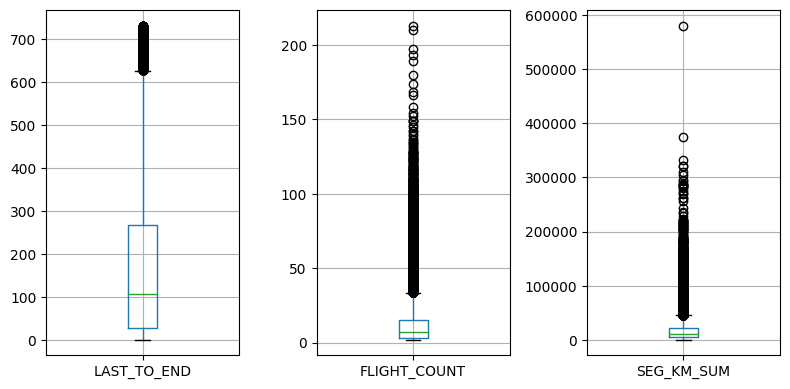

In [239]:
# Outlier Checking

list_columns = list(df.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(8,4))

for i, column_name in enumerate(list_columns):
    df.boxplot(column_name, ax=ax.flatten()[i])
    

plt.tight_layout()
plt.show()

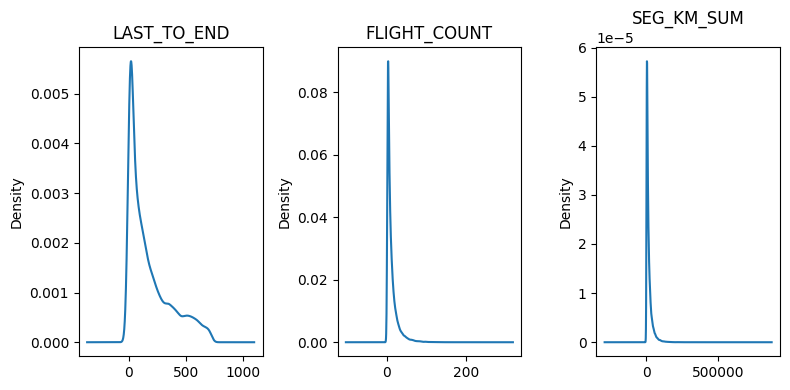

In [240]:
# Distribution of Data
 
list_columns = list(df.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(8,4))

for i, column_name in enumerate(list_columns):
    df[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

In [241]:
df.rename(columns = {'LAST_TO_END':'LAST_TO_END (R)', 'FLIGHT_COUNT':'FLIGHT_COUNT (F)', 'SEG_KM_SUM':'SEG_KM_SUM (M)'}, inplace=True)

In [242]:
df

,LAST_TO_END (R),FLIGHT_COUNT (F),SEG_KM_SUM (M)
0,1,210,580717
1,7,140,293678
2,11,135,283712
3,97,23,281336
4,5,152,309928
...,...,...,...
62983,297,2,1134
62984,89,4,8016
62985,29,2,2594
62986,400,2,3934


# Data Pre-processing 

In [243]:
df.corr()

,LAST_TO_END (R),FLIGHT_COUNT (F),SEG_KM_SUM (M)
LAST_TO_END (R),1.000000,-0.404999,-0.369509
FLIGHT_COUNT (F),-0.404999,1.000000,0.850411
SEG_KM_SUM (M),-0.369509,0.850411,1.000000


In [244]:
from sklearn.preprocessing import QuantileTransformer

quantile_trans = QuantileTransformer(n_quantiles=1000, output_distribution='normal')
df_scaled = quantile_trans.fit_transform(df)

In [245]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,LAST_TO_END (R),FLIGHT_COUNT (F),SEG_KM_SUM (M)
0,-5.199338,4.005381,5.199338
1,-1.368450,3.173397,3.185191
2,-1.161976,3.154115,3.175301
3,-0.067799,1.104747,3.172989
4,-1.525529,3.225167,3.202017
...,...,...,...
62983,0.758004,-5.199338,-2.501455
62984,-0.111890,-0.492137,-0.192535
62985,-0.681594,-5.199338,-1.367617
62986,1.048748,-5.199338,-0.880888


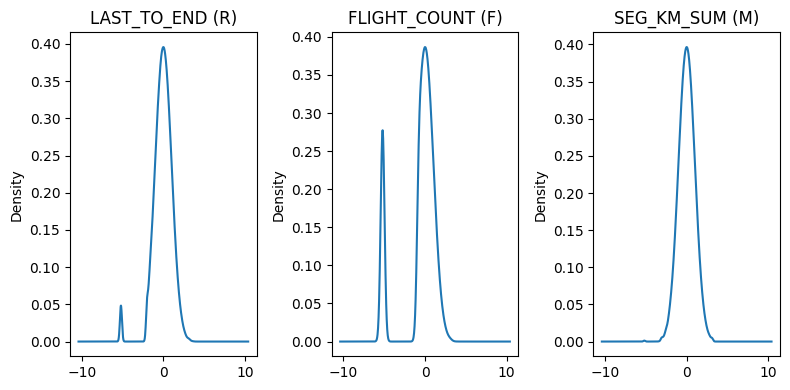

In [246]:
list_columns = list(df_scaled.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(8,4))

for i, column_name in enumerate(list_columns):
    df_scaled[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

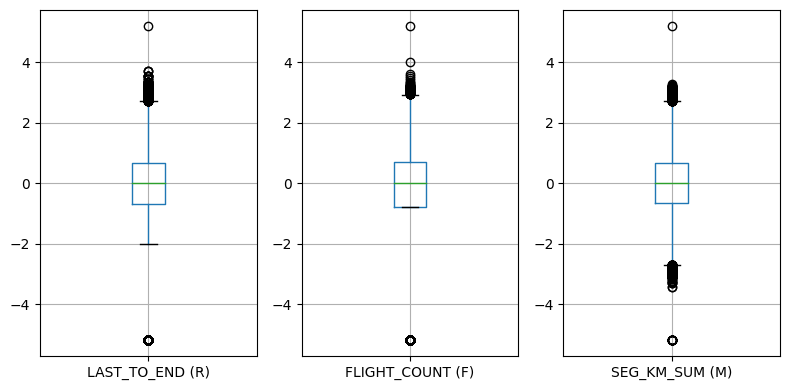

In [247]:
list_columns = list(df_scaled.columns.values)

num_rows = 1
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(8, 4))

for i, column_name in enumerate(list_columns):
    df_scaled.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [248]:
# Outlier Persentation

for i, j in df_scaled.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    inter_q = q3 - q1

    j_col = j[(j <= q1 - 1.5 * inter_q) | (j >= q3 + 1.5 * inter_q)]
    percent = np.shape(j_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f" %(i, percent))

Column LAST_TO_END (R) outliers = 1.85
Column FLIGHT_COUNT (F) outliers = 16.68
Column SEG_KM_SUM (M) outliers = 0.71


In [249]:
df.shape

(62988, 3)

In [226]:
df

,LAST_TO_END (R),FLIGHT_COUNT (F),SEG_KM_SUM (M)
0,1,210,580717
1,7,140,293678
2,11,135,283712
3,97,23,281336
4,5,152,309928
...,...,...,...
62983,297,2,1134
62984,89,4,8016
62985,29,2,2594
62986,400,2,3934


# K-MEANS LTS
## Function: Create cluster without outliers, which was trimmed unsupervised

In [256]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

def K_MEANS_LTS(dataframe, n_cluster_lts, trim_percent):
    kmeans = KMeans(n_clusters=n_cluster_lts, init='k-means++', random_state=42).fit(dataframe)

    # Finding the distance of each point to its centroid in its cluster
    dataframe['test_dist'] = np.min(kmeans.transform(dataframe), axis=1)
    dataframe['cluster_id'] = kmeans.labels_
    
    # Urutkan dataset berdasarkan jarak (ascending) untuk setiap cluster
    """
    divide dataframe menjadi n_cluster_lts bagian berdasarkan cluster_id
    
    
    urutkan per dataframe
    """
    cluster_df = [dataframe[dataframe['cluster_id'] == i].drop('cluster_id', axis=1) for i in range(n_cluster_lts)]
    cluster_df = pd.concat(cluster_df, ignore_index=True)
        
    for i, cluster_df in enumerate(cluster_df):
        
        if 'test_dist' in cluster_df.columns:
        sorted_cluster_df = cluster_df.sort_values('test_dist', ascending=False)
        sorted_cluster_df = pd.concat(sorted_cluster_df, ignore_index=True)

        rows_to_keep = int((100 - trim_percent) / 100 * len(sorted_cluster_df))
        trimmed_cluster_df = sorted_cluster_df.tail(rows_to_keep)

   
    # Potong dataset
    """
    highest_silhouette = 0
    trimmed_percentage = 5
    trimmed_dataframe = dataframe

    for (curr_percentage 5 s.d. 20%,
    increment 5%):
    temp_dataset = dataframe //ini bingung gimana cara proses potong per clusternya?

    flag dataset (cluster id 0 s.d. k) yang masuk ke top curr_percentage: jadi cluster id: 0-out, 1-out, dsb

    cluster dataset unflagged data (kmeans)

    cari curr_silhouette score

    if curr_silhouette_score >= highest_silhouette:
        highest_silhouette = curr_silhouette
        trimmed_percentage = curr_percentage
        trimmed_dataframe = temp_dataset
    """

    # Return dataframe (flagged, clustered) terbaik

    return trimmed_cluster_df

df_test = pd.DataFrame({'Type1': [0.0, 0.0, 473.6, 0.0, 0.0],
                   'Type2': [0.0, 63.72, 174.0, 996.0, 524.91],
                   'Type3': [0.0, 0.0, 31.6, 160.92, 0.0]})

testLTS = K_MEANS_LTS(df_test, 2, 10)
print(testLTS)

   Type1   Type2   Type3   test_dist
1    0.0  524.91    0.00  248.908133
0    0.0  996.00  160.92  248.908133
2    0.0    0.00    0.00  176.951443
3    0.0   63.72    0.00  158.977061


## Find K for K-Means LTS

In [228]:
# from sklearn.metrics import silhouette_score

# silhoutte_scores = [silhouette_score(df_scaled, model.labels_) for model in kmeans_models[1:4]]
# plt.plot(range(2,5), silhoutte_scores, "bo-")
# plt.xticks([2, 3, 4])
# plt.title('Silhoutte score vs Nilai K')
# plt.xlabel('Nilai K')
# plt.ylabel('Silhoutte score')
# plt.show()

In [229]:
# Create cluster with K-Means LTS - find the best K
# from sklearn.metrics import silhouette_score

# k_value = [2, 3, 4, 5, 6, 7, 8]
# scores = {}

# for k in k_value:
#     kmeans_lts = K_MEANS_LTS(df_scaled, k)
#     cluster_labels = kmeans_lts['cluster_id']

#     silhouette_avg = silhouette_score(df_scaled, cluster_labels)
#     scores[k] = [silhouette_avg]

# for k, value in scores.items():
#     print(" For k = {}, the silhouette score is: {}".format(k, value))

# key = list(scores.keys())
# value = list(scores.values())

# fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(key, value)
# plt.xlabel('Values of K')
# plt.xticks(k_value)
# plt.ylabel('Silhouette Score')
# plt.style.use('ggplot')
# plt.title('Best K based on Silhouette Score')
# plt.show()

In [230]:
# import numpy as np
# import pandas as pd
# import sklearn.cluster as cluster
# import scipy.spatial.distance as sdist

# df = pd.DataFrame({'Type1': [0.0, 0.0, 473.6, 0.0, 0.0],
#  'Type2': [0.0, 63.72, 174.0, 996.0, 524.91],
#  'Type3': [0.0, 0.0, 31.6, 160.92, 0.0],
#  'id': [1000, 10001, 10002, 10003, 10004]})

# points = df.drop('id', axis=1)
# kmeans = cluster.KMeans(n_clusters=5, random_state=0).fit(points)
# df['cluster'] = kmeans.labels_

# centroids = kmeans.cluster_centers_
# dists = pd.DataFrame(
#     sdist.cdist(points, centroids), 
#     columns=['dist_{}'.format(i) for i in range(len(centroids))],
#     index=df.index)
# df = pd.concat([df, dists], axis=1)

# print(df)

In [231]:
points = df.copy()
points

,LAST_TO_END (R),FLIGHT_COUNT (F),SEG_KM_SUM (M)
0,1,210,580717
1,7,140,293678
2,11,135,283712
3,97,23,281336
4,5,152,309928
...,...,...,...
62983,297,2,1134
62984,89,4,8016
62985,29,2,2594
62986,400,2,3934


In [232]:
df

,LAST_TO_END (R),FLIGHT_COUNT (F),SEG_KM_SUM (M)
0,1,210,580717
1,7,140,293678
2,11,135,283712
3,97,23,281336
4,5,152,309928
...,...,...,...
62983,297,2,1134
62984,89,4,8016
62985,29,2,2594
62986,400,2,3934


In [254]:
df_test = pd.DataFrame({'Type1': [0.0, 0.0, 473.6, 0.0, 0.0],
                   'Type2': [0.0, 63.72, 174.0, 996.0, 524.91],
                   'Type3': [0.0, 0.0, 31.6, 160.92, 0.0],
                   'id': [1000, 10001, 10002, 10003, 10004]})

points = df_test.drop('id', axis=1)
# or points = df[['Type1', 'Type2', 'Type3']]

# points = df.copy()
kmeans = KMeans(n_clusters=2, random_state=0).fit(points)
df_test['cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_
df_test['dist_to_centroid'] = np.linalg.norm(points - centroids[df_test['cluster']], axis=1)

df_test.groupby('cluster').agg(count_cluster = ('cluster', 'count'))


,count_cluster
cluster,
0,2
1,3


In [255]:
trim_percent = 10

cluster_df = [df_test[df_test['cluster'] == i].drop('cluster', axis=1) for i in range(2)]
# Menampilkan DataFrame untuk setiap cluster
for i, cluster_df in enumerate(cluster_df):

    cluster_df = pd.DataFrame(cluster_df)
    # print(f"Cluster {i}:\n{cluster_df}\n")

    # mengurutkan dataframe berdasarkan jarak ke centroid
    if 'dist_to_centroid' in cluster_df.columns:
        sorted_cluster_df = cluster_df.sort_values('dist_to_centroid', ascending=False)
        # print(f"Cluster {i}:\n{sorted_cluster_df}\n")

        # memotong 10% data tiap dataframe yg memiliki jarak terbesar
        rows_to_keep = int((100 - trim_percent) / 100 * len(sorted_cluster_df))
        trimmed_cluster_df = sorted_cluster_df.tail(rows_to_keep)
        print(f"Cluster {i}:\n{trimmed_cluster_df}\n")


# print(cluster_df)
# print(df)

Cluster 0:
   Type1   Type2  Type3     id  dist_to_centroid
4    0.0  524.91    0.0  10004        248.908133

Cluster 1:
   Type1  Type2  Type3     id  dist_to_centroid
0    0.0   0.00    0.0   1000        176.951443
1    0.0  63.72    0.0  10001        158.977061

